In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry as geom
import numpy as np
import pandas as pd
import geopandas as gpd
import time

In [2]:
path = '.'

In [66]:
# Load the level of vehicles data (MotoRate)
# source data: https://data.gov.il/dataset/taz_mot_rate_2040

LRT_stations = gpd.read_file(path + '/Data/Rakevet_Kala/LRT_STAT.shp')
TMA_lines = gpd.read_file(path + '/Data/Kavim-Amusim-2023/TMA_23A4_LINES.shp')
MotoRate = gpd.read_file(path + '/Data/Cars-2024/TAZ_MOT_RATE_2040.shp')

In [72]:
MotoRate

,OBJECTID,MOTORATE40,SHAPE_Leng,SHAPE_Area,geometry
0,1,374.0,17963.224932,1.108217e+07,"POLYGON ((254423.194 789330.221, 254420.804 78..."
1,2,460.0,20917.987910,1.574294e+07,"POLYGON ((254348.399 792623.578, 254264.382 79..."
2,3,361.0,28730.237719,1.674664e+07,"POLYGON ((252268.486 796317.048, 252314.087 79..."
3,4,318.0,33204.889537,4.177773e+07,"POLYGON ((274990.935 796003.174, 276328.083 79..."
4,5,441.0,96407.376656,4.649245e+08,"POLYGON ((259273.161 768785.141, 259406.787 76..."
...,...,...,...,...,...
580,581,370.0,21838.796921,1.771878e+07,"POLYGON ((189115.774 645433.404, 189323.695 64..."
581,582,398.0,8128.959247,3.236960e+06,"POLYGON ((179301.872 663400.715, 179277.934 66..."
582,583,502.0,8935.516635,3.471519e+06,"POLYGON ((179737.919 667112.442, 179742.968 66..."
583,584,336.0,9024.731260,3.253196e+06,"POLYGON ((182886.227 674382.258, 182873.730 67..."


In [73]:
MotoRate.loc[MotoRate['MOTORATE40'] == 0, 'MOTORATE40'] = 100

C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\2463242060.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='MOTORATE40')
C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\2463242060.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


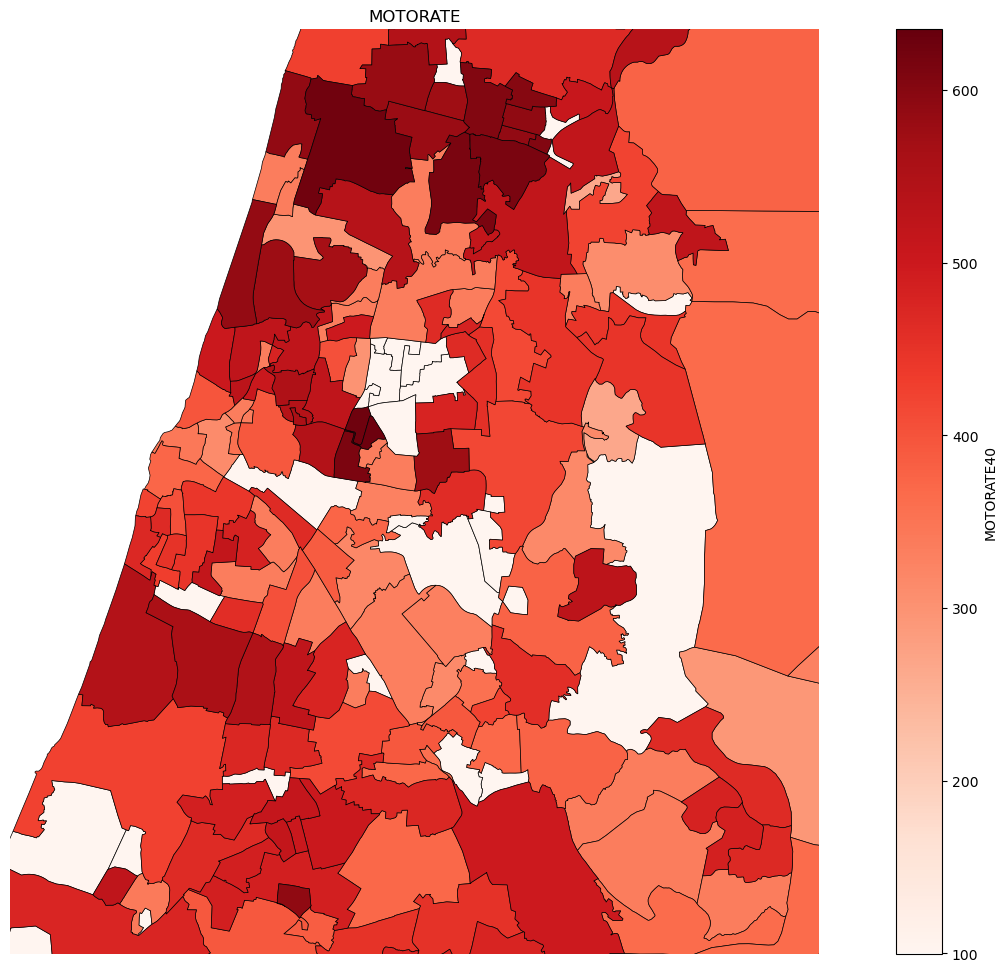

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Сортировка MotoRate по MOTORATE40
sorted_MotoRate = MotoRate.sort_values(by='MOTORATE40')

# Нормализация значений MOTORATE40
norm = plt.Normalize(min(sorted_MotoRate['MOTORATE40']), max(sorted_MotoRate['MOTORATE40']))
sorted_MotoRate['color'] = norm(sorted_MotoRate['MOTORATE40'])

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(20, 12))

# Отображение геометрии с цветовой дифференциацией
sorted_MotoRate.plot(ax=ax, column='color', cmap='Reds', edgecolor='black', linewidth=0.5)

# Добавление заголовка и цветовой шкалы
ax.set_title('MOTORATE')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
fig.colorbar(sm, label='MOTORATE40')

# Отображение карты
ax.axis('off')  # Скрыть оси

ax.set_xlim([170000, 205000])
ax.set_ylim([640000, 680000])
fig.show()


C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\187067468.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='MOTORATE40')
C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\187067468.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


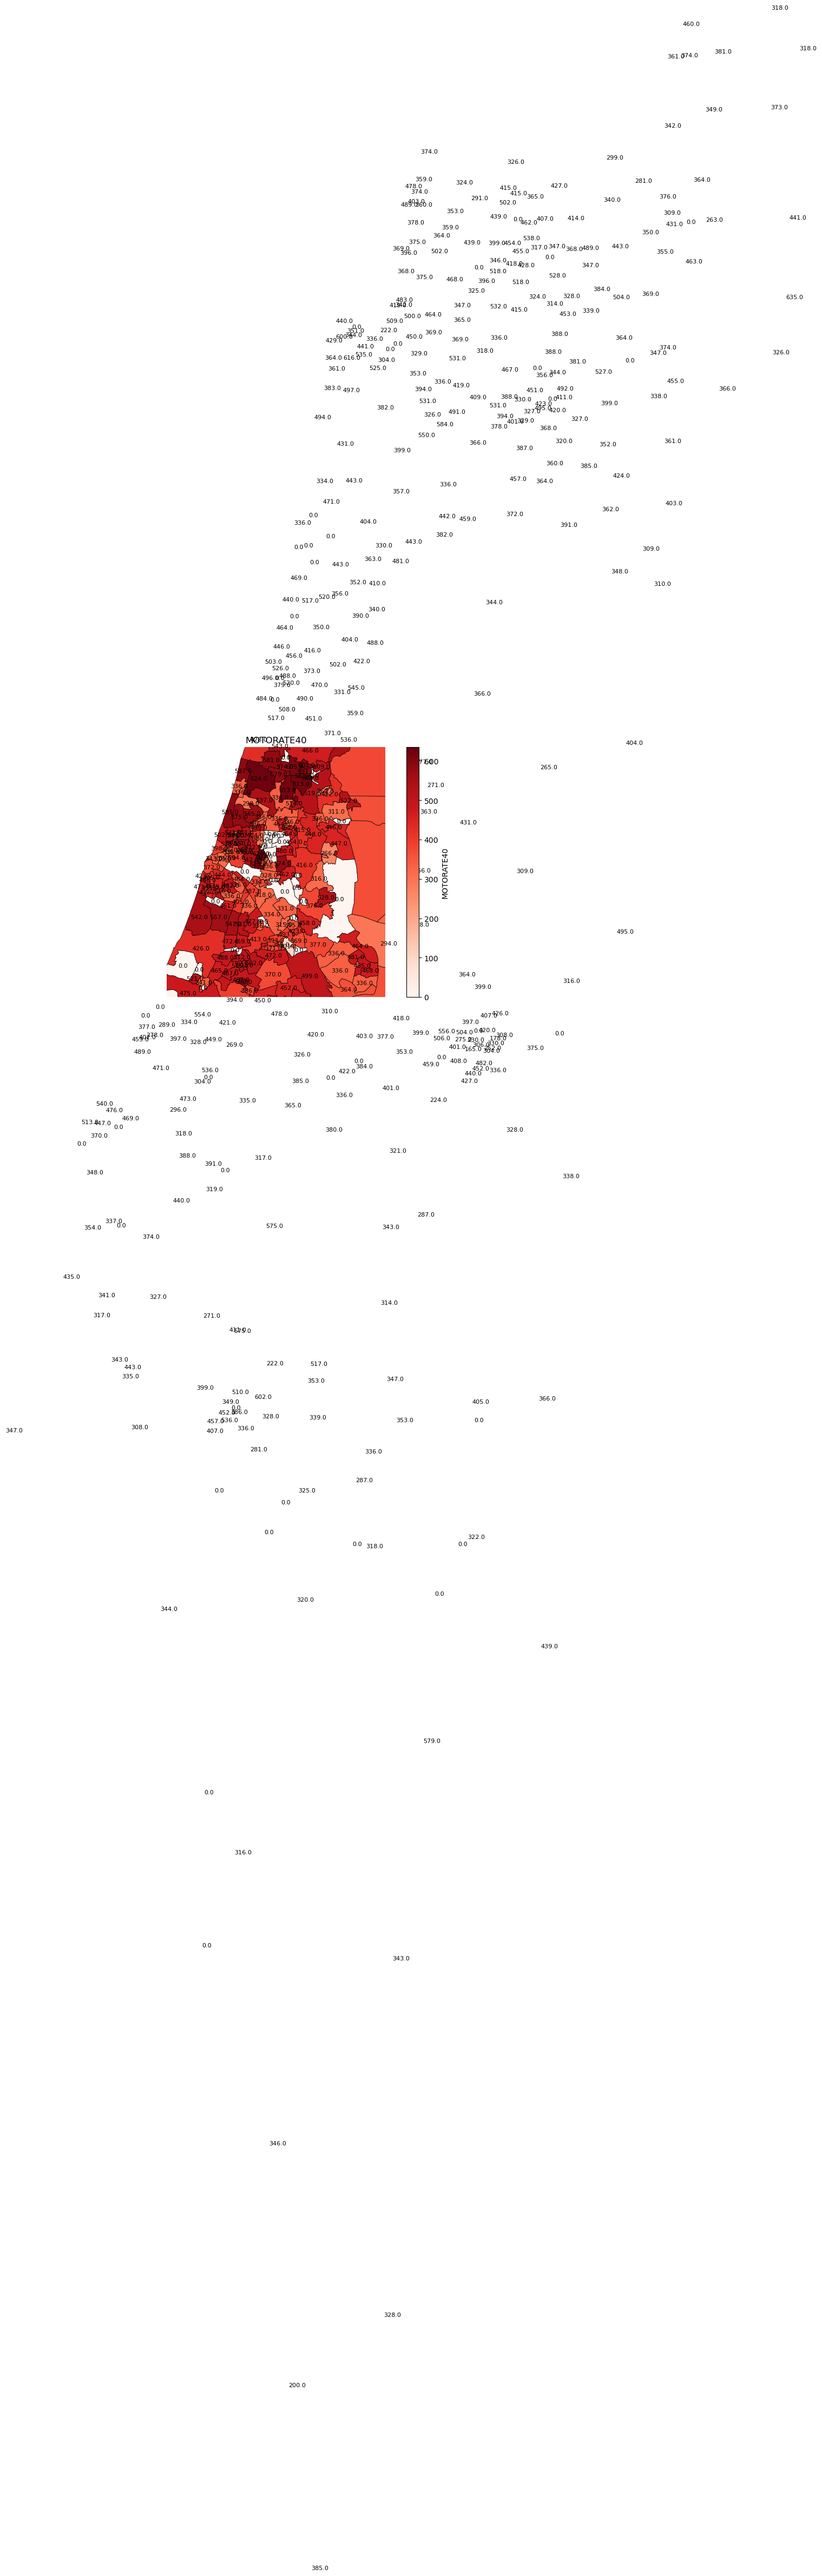

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Загрузка GeoDataFrame MotoRate
# MotoRate = gpd.read_file('MotoRate.shp')  # Замените 'MotoRate.shp' на путь к вашему файлу

# Сортировка MotoRate по MOTORATE40
sorted_MotoRate = MotoRate.sort_values(by='MOTORATE40')

# Нормализация значений MOTORATE40
norm = plt.Normalize(min(sorted_MotoRate['MOTORATE40']), max(sorted_MotoRate['MOTORATE40']))
sorted_MotoRate['color'] = norm(sorted_MotoRate['MOTORATE40'])

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение геометрии с цветовой дифференциацией
sorted_MotoRate.plot(ax=ax, column='color', cmap='Reds', edgecolor='black', linewidth=0.5)

# Добавление значений MOTORATE40 на каждый район
for idx, row in sorted_MotoRate.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    text = f"{round(row['MOTORATE40'], 2)}"  # Отображение MOTORATE40 с округлением до 2 знаков
    ax.text(x, y, text, ha='center', va='center', fontsize=8, color='black')

# Добавление заголовка и цветовой шкалы
ax.set_title('MOTORATE40')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
fig.colorbar(sm, label='MOTORATE40')

# Отображение карты
ax.axis('off')  # Скрыть оси
ax.set_xlim([170000, 205000])
ax.set_ylim([640000, 680000])
fig.show()



C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\1713237241.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='MOTORATE40')
C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\1713237241.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


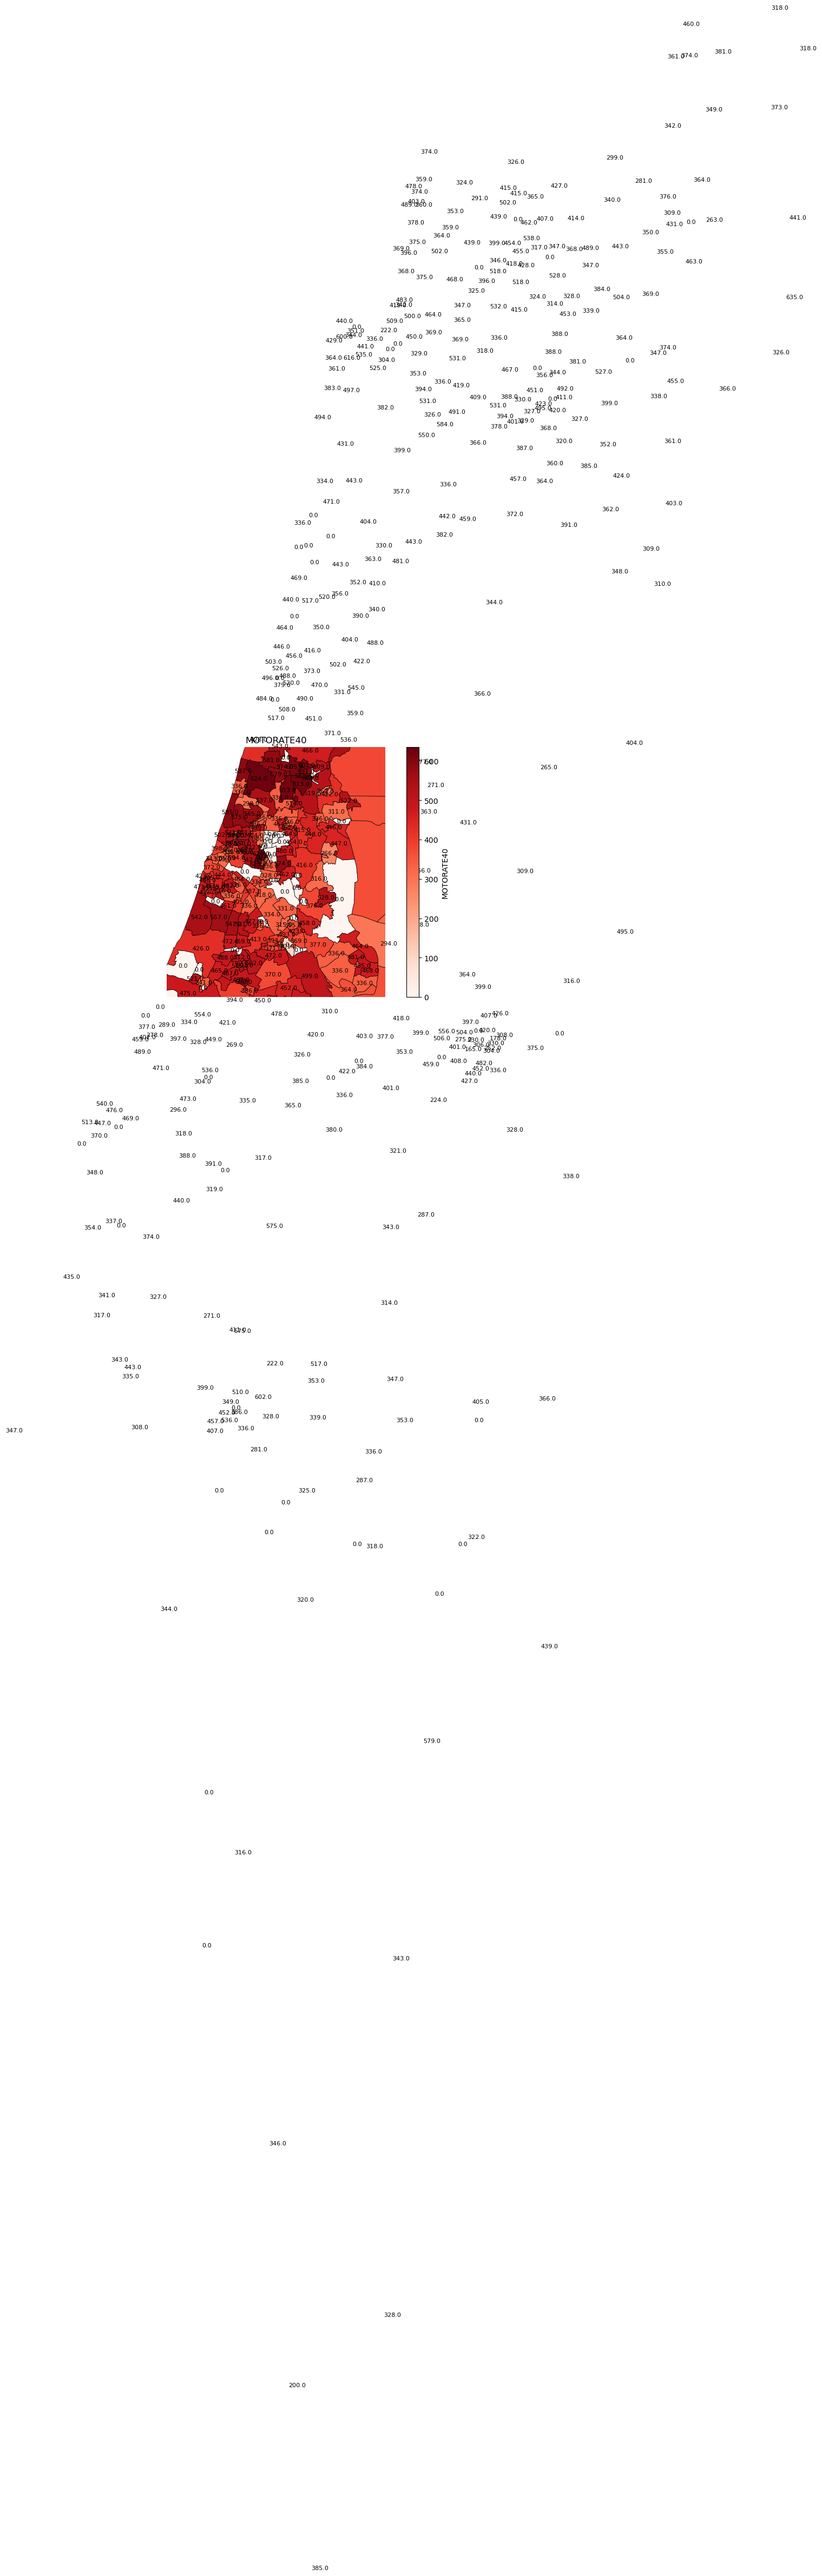

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Сортировка MotoRate по MOTORATE40
sorted_MotoRate = MotoRate.sort_values(by='MOTORATE40')

# Нормализация значений MOTORATE40
norm = plt.Normalize(min(sorted_MotoRate['MOTORATE40']), max(sorted_MotoRate['MOTORATE40']))
sorted_MotoRate['color'] = norm(sorted_MotoRate['MOTORATE40'])

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение геометрии с цветовой дифференциацией
sorted_MotoRate.plot(ax=ax, column='color', cmap='Reds', edgecolor='black', linewidth=0.5)

# Добавление значений MOTORATE40 на каждый район
for idx, row in sorted_MotoRate.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    text = f"{round(row['MOTORATE40'], 2)}"  # Отображение MOTORATE40 с округлением до 2 знаков
    ax.text(x, y, text, ha='center', va='center', fontsize=8, color='black')

# Добавление заголовка и цветовой шкалы
ax.set_title('MOTORATE40')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
fig.colorbar(sm, label='MOTORATE40')

# Отображение карты
ax.axis('off')  # Скрыть оси
ax.set_xlim([170000, 205000])  # Задать пределы по x
ax.set_ylim([640000, 680000])  # Задать пределы по y
fig.show()


C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\1176584839.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='MOTORATE40')
C:\Users\andrey.lopatuhin\AppData\Local\Temp\ipykernel_39868\1176584839.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


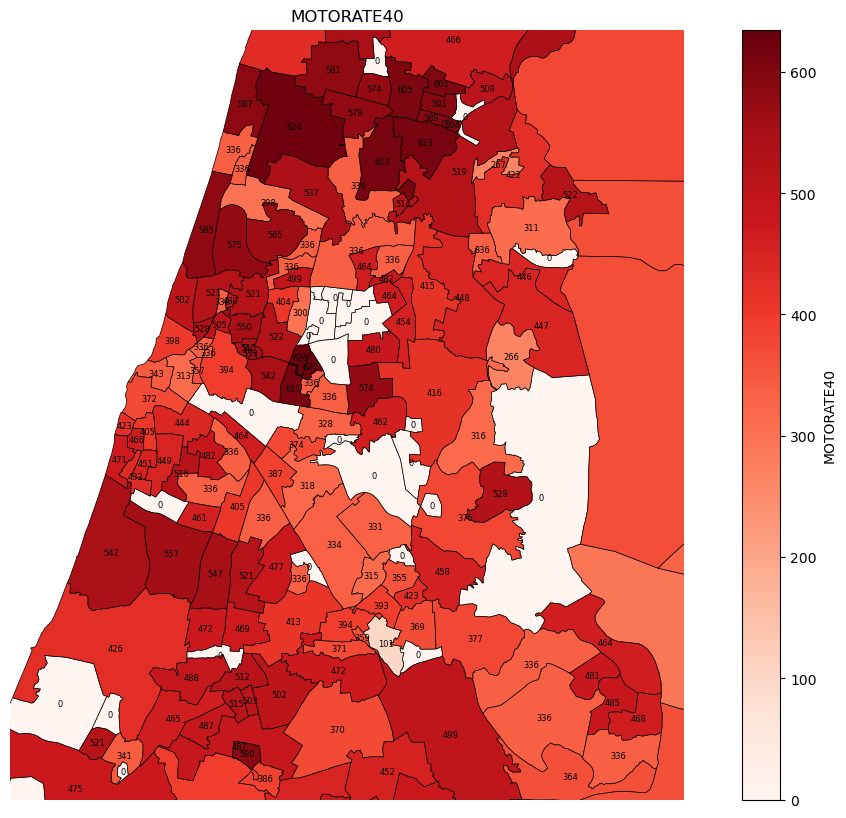

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Сортировка MotoRate по MOTORATE40
MotoRate = gpd.read_file(path + '/Data/Cars-2024/TAZ_MOT_RATE_2040.shp')
sorted_MotoRate = MotoRate.sort_values(by='MOTORATE40')

# Нормализация значений MOTORATE40
norm = plt.Normalize(min(sorted_MotoRate['MOTORATE40']), max(sorted_MotoRate['MOTORATE40']))
sorted_MotoRate['color'] = norm(sorted_MotoRate['MOTORATE40'])

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(15, 10))

# Отображение геометрии с цветовой дифференциацией
sorted_MotoRate.plot(ax=ax, column='color', cmap='Reds', edgecolor='black', linewidth=0.5)

# Добавление значений MOTORATE40 на каждый район
for idx, row in sorted_MotoRate.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    # Проверка, находится ли район в пределах заданных границ
    if 170000 <= x <= 205000 and 640000 <= y <= 680000:
        text = f"{int(row['MOTORATE40'])}"  # Отображение MOTORATE40
        ax.text(x, y, text, ha='center', va='center', fontsize=6, color='black')

# Добавление заголовка и цветовой шкалы
ax.set_title('MOTORATE40')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
fig.colorbar(sm, label='MOTORATE40')

# Отображение карты
ax.axis('off')  # Скрыть оси
ax.set_xlim([170000, 205000])  # Задать пределы по x
ax.set_ylim([640000, 680000])  # Задать пределы по y
fig.show()

# Save the plot as a JPEG image
fig.savefig('MotoRate_JPEG.jpg', dpi=300, bbox_inches='tight')  # Replace 'MotoRate_JPEG.jpg' with your desired filename

(640000.0, 680000.0)

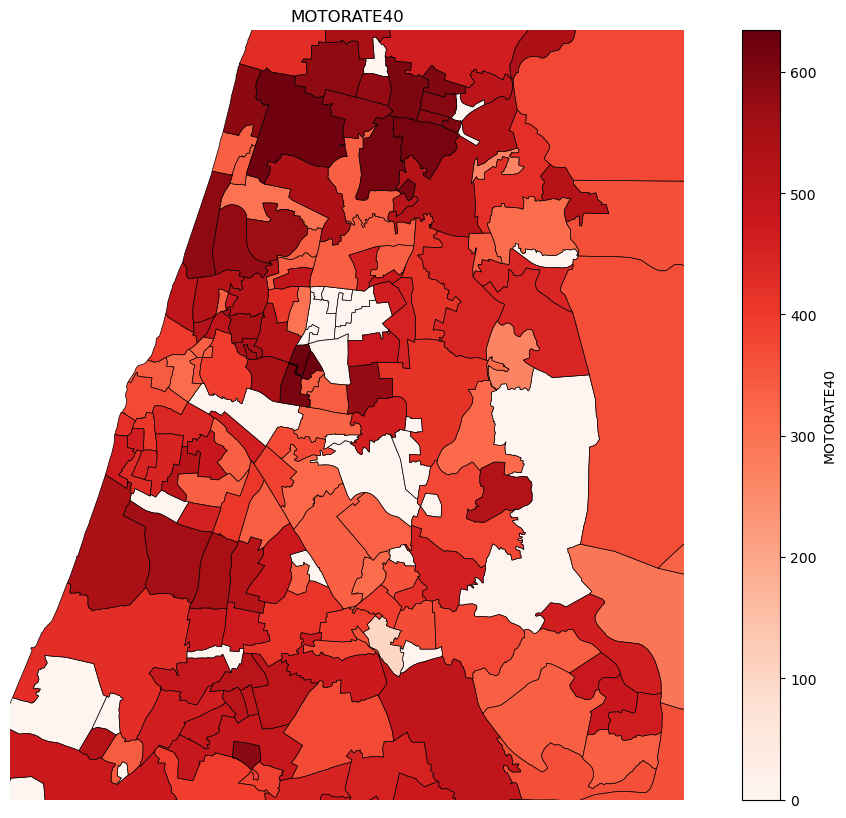

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle

# Загрузите данные MotoRate
# MotoRate = gpd.read_file(path + '/Data/Cars-2024/TAZ_MOT_RATE_2040.shp')
# MotoRate = gpd.read_file('MotoRate.shp')
# Loading the saved dataset MotoRate_df
with open('MotoRate_df.pkl', 'rb') as file:
     MotoRate = pickle.load(file)  
        
# Сортировка MotoRate по MOTORATE40
sorted_MotoRate = MotoRate.sort_values(by='MOTORATE40')

# Нормализация значений MOTORATE40
norm = plt.Normalize(min(sorted_MotoRate['MOTORATE40']), max(sorted_MotoRate['MOTORATE40']))
sorted_MotoRate['color'] = norm(sorted_MotoRate['MOTORATE40'])

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(15, 10))

# Отображение геометрии с цветовой дифференциацией
sorted_MotoRate.plot(ax=ax, column='color', cmap='Reds', edgecolor='black', linewidth=0.5)

# # Добавление значений MOTORATE40 на каждый район
# for idx, row in sorted_MotoRate.iterrows():
#     x, y = row.geometry.centroid.x, row.geometry.centroid.y
#     # Проверка, находится ли район в пределах заданных границ
#     if 170000 <= x <= 205000 and 640000 <= y <= 680000:
#         text = f"{int(row['MOTORATE40'])}"  # Отображение MOTORATE40
#         ax.text(x, y, text, ha='center', va='center', fontsize=6, color='black')

# Добавление заголовка и цветовой шкалы
ax.set_title('MOTORATE40')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
fig.colorbar(sm, label='MOTORATE40', ax=ax)  # Явно указать ось ax

# Отображение карты
ax.axis('off')  # Скрыть оси
ax.set_xlim([170000, 205000])  # Задать пределы по x
ax.set_ylim([640000, 680000])  # Задать пределы по y

# Сохранить график как JPEG-изображение
# fig.savefig('MotoRate_JPEG.jpg', dpi=300, bbox_inches='tight')  # Заменить 'MotoRate_JPEG.jpg' на желаемое имя файла


(645000.0, 683000.0)

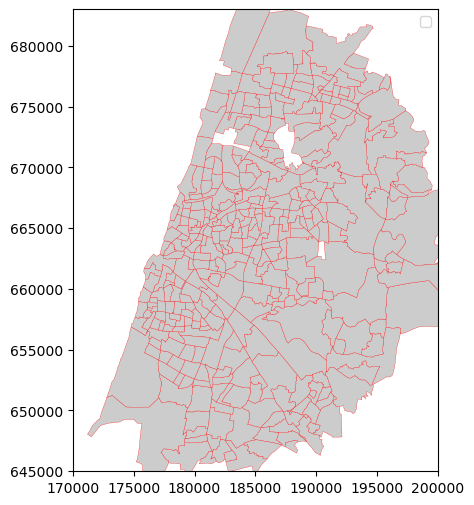

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle
# Loading the saved dataset GushDan_B
with open('GushDan_B.pkl', 'rb') as file:
     GushDan = pickle.load(file)

GushDan = gpd.GeoDataFrame(GushDan, geometry=GushDan["geometry"])

# Presentation of  zones, heavy passenger lines  and  LRT stations in the Tel Aviv metropolis

fig, ax = plt.subplots(1, figsize =(10,6))
GushDan.plot(ax=ax, color ='#CCCCCC', edgecolor = '#FF0000', linewidth = 0.2)


ax.legend(['LRT stations', 'BRT stations','TMA lines'])

ax.set_xlim([170000, 200000])
ax.set_ylim([645000, 683000])

In [26]:
GushDan.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ToZone                   364 non-null    int64   
 1   LRT_Distance_B           364 non-null    float64 
 2   TMA_Distance_B           364 non-null    float64 
 3   MotoRate_B               364 non-null    float64 
 4   Density_jobs3_B          364 non-null    float64 
 5   Industrial_Distance_B    364 non-null    float64 
 6   Population_B             364 non-null    float64 
 7   Average_age_B            364 non-null    float64 
 8   Level_ultra-Orthodox_B   364 non-null    float64 
 9   Workers_B                364 non-null    float64 
 10  Area_m2_B                364 non-null    float64 
 11  Pop_Density_Sqkm_B       364 non-null    float64 
 12  Socio_Economic_Index_B   364 non-null    float64 
 13  X_B                      364 non-null    float64 
 14  Y_

In [27]:
GushDan.tail(45)

,ToZone,LRT_Distance_B,TMA_Distance_B,MotoRate_B,Density_jobs3_B,Industrial_Distance_B,Population_B,Average_age_B,Level_ultra-Orthodox_B,Workers_B,Area_m2_B,Pop_Density_Sqkm_B,Socio_Economic_Index_B,X_B,Y_B,Municipality_category_B,Land_use_category_B,Municipality_B,Area_detail_B,geometry
319,100437,2480.430925,2537.116546,376.040528,135.455180,0.000000,1174.0,34.000000,5.0,612.0,5393358.0,4594.001704,5.0,193244.706789,656031.144919,20,1,Hebol Modi'in Regional Council,Beit Arif,"POLYGON ((191620.724 655905.833, 192279.931 65..."
320,100028,0.199245,0.603115,520.999891,8432.997154,3240.759584,10895.0,36.000000,5.0,6872.0,720756.0,66.154750,8.0,180248.923053,666818.873202,0,1,Tel Aviv Jaffa,Judah Maccabee,"POLYGON ((179673.832 666560.117, 179692.293 66..."
321,100299,7703.319844,0.000000,605.005573,3537.525164,1582.091219,3530.0,40.000000,5.0,1960.0,256785.0,72.743626,8.0,190249.065612,675792.164756,9,1,Kfar Saba,-,"POLYGON ((189925.802 675801.888, 189926.086 67..."
322,100158,0.000000,0.000000,444.006914,2926.926738,617.666248,13905.0,41.000000,5.0,6938.0,589443.0,42.390723,7.0,179261.953696,659194.642595,3,1,Holon,Popular housing and Agrobank,"POLYGON ((179761.673 659140.462, 179780.053 65..."
323,100145,244.301196,136.249059,465.933389,2118.012012,652.134624,8191.0,41.000000,5.0,4491.0,270246.0,32.993041,5.0,176637.191129,659061.481816,5,1,Bat Yam,"Rabbi Herzog, Independence Ave., Rabbi Uziel","POLYGON ((176551.733 659278.670, 176644.663 65..."
324,100434,3878.240986,4860.413723,269.652281,1556.673343,238.872485,14813.0,21.000000,2.0,4617.0,894510.0,60.386822,2.0,195303.446938,661912.277828,27,1,Elad,"District E, District H, District F, District G","POLYGON ((195842.712 661396.640, 195835.229 66..."
325,100462,152.946602,0.000000,447.656864,4.365689,0.000000,0.0,32.636963,5.0,0.0,1367240.0,0.000000,5.0,180130.182243,660683.825944,0,59,Tel Aviv Jaffa,Bus parking lot,"POLYGON ((181145.090 660139.726, 180995.331 65..."
326,100226,5489.974304,1335.750527,417.226281,1161.773894,0.000000,11989.0,29.000000,5.0,6537.0,5212125.0,434.742264,7.0,183879.107132,648544.317966,24,1,Be'er Ya'akov,Hatar and Netzer Sarni,"POLYGON ((182565.073 647572.228, 182508.280 64..."
327,100470,9617.876882,0.000000,600.943705,1666.419637,540.778150,6085.0,35.000000,5.0,3309.0,1834313.0,301.448316,8.0,192402.772173,677165.978863,9,1,Kfar Saba,-,"POLYGON ((192623.819 676669.647, 192614.664 67..."
328,100430,139.442576,239.111482,342.540646,196.340751,0.000000,5150.0,30.000000,5.0,2539.0,13245460.0,2571.933981,7.0,193769.876451,658900.840999,20,1,Hebol Modi'in Regional Council,Tirat Yehuda Givat Kach Barkat Bnei Atarot,"POLYGON ((192109.310 657572.527, 191928.788 65..."


KeyError: 'Area'

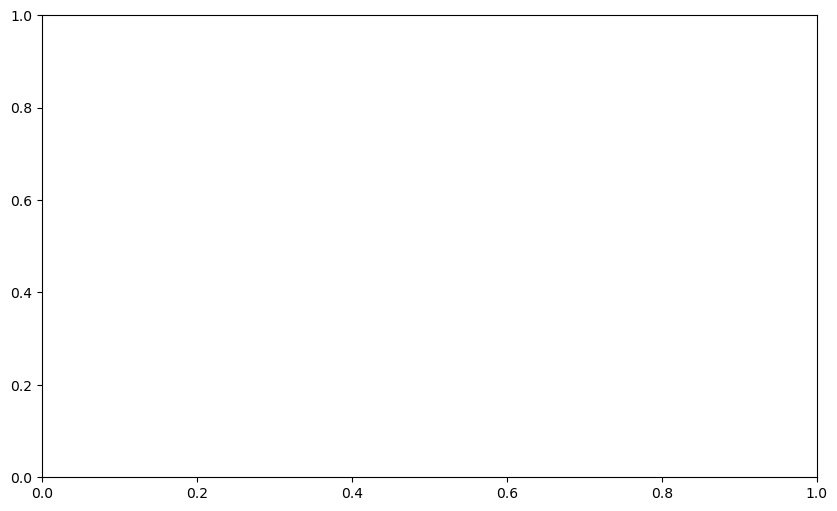

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# source data: https://data.gov.il/dataset/tma_23a4_lines

TMA_lines = gpd.read_file(path + '/Data/Kavim-Amusim-2023/TMA_23A4_LINES.shp')

# Сгруппируйте данные по Municipality_B
grouped_data = GushDan.groupby('Municipality_B')

# Создайте словарь для хранения цветов для каждого города
city_colors = {'Tel Aviv Jaffa': 'blue', 'Holon': 'red', 'Ramat Hasharon': 'green'}

# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение геометрии каждого города своим цветом
for municipality, data in grouped_data:
    color = city_colors[municipality]
    data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)

# Добавление заголовка
ax.set_title('Города Израиля')

# Отключение осей
ax.axis('off')
fig.show()

# Сохранение изображения
fig.savefig('Israel_Cities.jpg', dpi=300, bbox_inches='tight')


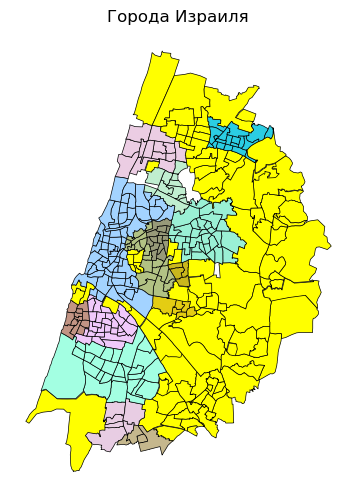

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Сгруппируйте данные по Municipality_B
grouped_data = GushDan.groupby('Municipality_B')

# Создайте словарь с основными городами и их цветами
major_cities = {
    'Tel Aviv Jaffa': '#A3D3FF',
    'Holon': '#F0C9FB',
    'Ramat Hasharon': '#C0EED0',
    'Petah Tikva': '#9AF0D5',
    'Rishon Lezion': '#A3FFE2',
    'Bnei Brak': '#989A79',
    'Ramat Gan': '#B2C284' ,
    'Bat Yam': '#C29484',
    'REHOVOT': '#C5B78D',
    'Kiryat Ono': '#C9B71D',
    'Herzliya': '#EBCDE3',
    'Or Yehuda': '#E4CD13',
    'Ness Ziona': '#E8CDE3',
    'Kfar Saba': '#2BCDE3',

    
    
    
}

# Создайте словарь для хранения цветов для каждого города
city_colors = dict(major_cities)  # Начните с цветов основных городов

# Добавьте цвета для остальных городов
for city in GushDan['Municipality_B'].unique():
    if city not in major_cities:
        city_colors[city] = 'yellow'  # Определите желтый цвет для остальных

# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение геометрии каждого города своим цветом
for municipality, data in grouped_data:
    color = city_colors[municipality]
    data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)

# Добавление заголовка
ax.set_title('Города Израиля')

# Отключение осей
ax.axis('off')

# Сохранение изображения
fig.savefig('Israel_Cities.jpg', dpi=300, bbox_inches='tight')


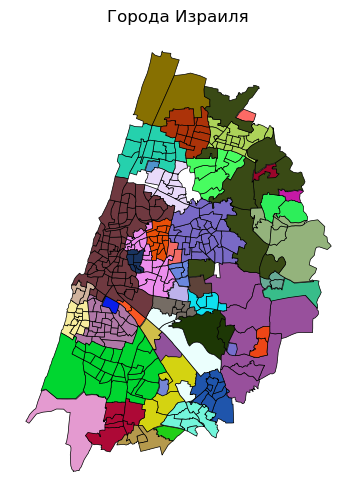

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import random

# Сгруппируйте данные по Municipality_B
grouped_data = GushDan.groupby('Municipality_B')

# Создайте словарь для хранения цветов для каждого города
city_colors = {}

# Генерируйте случайные цвета для каждого города
for city in GushDan['Municipality_B'].unique():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    color_hex = f"#{r:02x}{g:02x}{b:02x}"
    city_colors[city] = color_hex

# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение геометрии каждого города своим цветом
for municipality, data in grouped_data:
    color = city_colors[municipality]
    data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)

# Добавление заголовка
ax.set_title('Города Израиля')

# Отключение осей
ax.axis('off')

# Сохранение изображения
fig.savefig('Israel_Cities.jpg', dpi=300, bbox_inches='tight')


In [57]:

Industrial_Zones = gpd.read_file(path + '/Data/Industrial/INDUSTRIAL.shp')
print(Industrial_Zones.shape)
Industrial_Zones.head(2)

(427, 14)


,TABA_NUM,NAME,CITY,DISTRICT,MINORITY,OWNER,INDNETAREA,EMPNETAREA,BRUTOAREA,YEARMONTH,AUTHORITY,Shape_Leng,Shape_Area,geometry
0,5207/ג,גוש חלב,NaN,צפון,מיעוטים כללי,NaN,40501,0,99638,202201,גוש חלב (ג'יש),1579.603451,99639.790359,"POLYGON ((242531.766 769534.125, 242555.344 76..."
1,31/ג/במ,גן-נר,גן נר,צפון,NaN,NaN,39039,0,39037,202201,הגלבוע,793.614911,39037.507820,"POLYGON ((231096.266 715384.000, 231053.875 71..."


(640000.0, 680000.0)

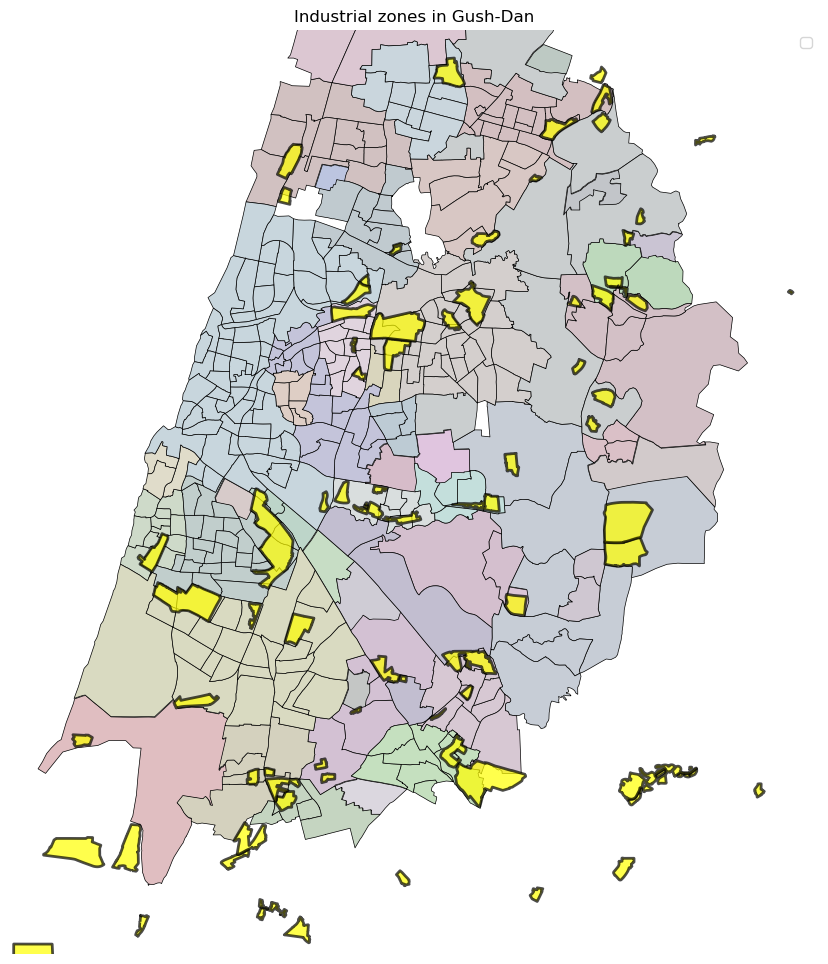

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
import random

# Сгруппируйте данные по Municipality_B
grouped_data = GushDan.groupby('Municipality_B')

# Создайте словарь для хранения цветов для каждого города
city_colors = {}

# Генерируйте "мягкие" цвета для каждого города
for city in GushDan['Municipality_B'].unique():
    # Ограничьте диапазон значений RGB
    r = random.randint(188, 224)
    g = random.randint(188, 224)
    b = random.randint(188, 224)

    # Конвертируйте в шестнадцатеричный код цвета HTML
    color_hex = f"#{r:02x}{g:02x}{b:02x}"
    city_colors[city] = color_hex

# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(20, 12))


# Отображение геометрии каждого города своим цветом
for municipality, data in grouped_data:
    color = city_colors[municipality]
    data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)




# Добавление заголовка
ax.set_title('Gush Dan')
# LRT_stations.plot(ax=ax, color ='#006400', alpha=0.7)
# LRT_stations.plot(ax=ax, color='#006400', alpha=0.9, zorder=2, markersize=20, linewidth=2)  # Adjust marker size (markersize), line width (linewidth), transparency (alpha), and z-order (zorder)
# TMA_lines.plot(ax=ax, color ='#FF4500' , linestyle ='--', alpha=0.9, markersize=20,)
# TMA_lines.plot(ax=ax, color='#FF4500', linestyle='--', alpha=0.8, markersize=20, linewidth=3)  # Adjust linewidth
# Industrial_Zones.plot(ax=ax, color ='yellow', alpha=0.7)
Industrial_Zones.plot(ax=ax, color='yellow', alpha=0.7, edgecolor='black', linewidth=2)  # Add edgecolor and linewidth


# Отключение осей
ax.axis('off')

ax.set_title('Industrial zones in Gush-Dan')

# Добавьте новый столбец "color" в GushDan
GushDan['color'] = GushDan['Municipality_B'].apply(lambda x: city_colors[x])


ax.legend(['LRT stations'])

ax.set_xlim([170000, 205000])
ax.set_ylim([640000, 680000])


# # Сохранение изображения
# fig.savefig('Israel_Cities.jpg', dpi=300, bbox_inches='tight')


In [52]:
GushDan.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ToZone                   364 non-null    int64   
 1   LRT_Distance_B           364 non-null    float64 
 2   TMA_Distance_B           364 non-null    float64 
 3   MotoRate_B               364 non-null    float64 
 4   Density_jobs3_B          364 non-null    float64 
 5   Industrial_Distance_B    364 non-null    float64 
 6   Population_B             364 non-null    float64 
 7   Average_age_B            364 non-null    float64 
 8   Level_ultra-Orthodox_B   364 non-null    float64 
 9   Workers_B                364 non-null    float64 
 10  Area_m2_B                364 non-null    float64 
 11  Pop_Density_Sqkm_B       364 non-null    float64 
 12  Socio_Economic_Index_B   364 non-null    float64 
 13  X_B                      364 non-null    float64 
 14  Y_

In [34]:
######################### GushDan_df
# From the dataset we will take only  necessary columns to ML models:
# The feature equal to zero is not included in the model.


# Create an array of 22 elements filled with True
feature_columns = [0] * 22

feature_columns[0] = 1  # TAZ_1270_B
feature_columns[1] = 1  # geometry
# feature_columns[2] = 1  # LRT_Distance_B
# feature_columns[3] = 1  # TMA_Distance_B
# feature_columns[4] = 1  # MotoRate_B
# feature_columns[5] = 1  # Density_jobs3_B
# feature_columns[6] = 1  # Industrial_Distance_B
feature_columns[7] = 1  # Municipality_B
feature_columns[8] = 1  # Area_detail_B
# feature_columns[9] = 1  # Population_B
# feature_columns[10] = 1  # Average_age_B
# feature_columns[11] = 1  # Level_ultra-Orthodox_B
# feature_columns[12] = 1  # Land_use_B
# feature_columns[13] = 1  # Workers_B
# feature_columns[14] = 1  # Area_m2_B
# feature_columns[15] = 1  # Pop_Density_Sqkm_B
# feature_columns[16] = 1  # Socio_Economic_Index_B
# feature_columns[17] = 1  # X_B
# feature_columns[18] = 1  # Y_B
feature_columns[19] = 1  # Municipality_category_B
# feature_columns[20] = 1  # Land_use_category_B
feature_columns[21] = 1  # color


mask = np.array(feature_columns).astype(bool)
Municipality_df = GushDan.loc[:, mask]

Municipality_df

IndexError: Boolean index has wrong length: 22 instead of 21

In [35]:
with open('Municipality_df.pkl', 'wb') as file:
  pickle.dump(Municipality_df, file)

LRT_stations = gpd.read_file(path + '/Data/Rakevet_Kala/LRT_STAT.shp')
TMA_lines = gpd.read_file(path + '/Data/Kavim-Amusim-2023/TMA_23A4_LINES.shp')
MotoRate = gpd.read_file(path + '/Data/Cars-2024/TAZ_MOT_RATE_2040.shp')

NameError: name 'Municipality_df' is not defined

In [36]:
Municipality_df.info()

NameError: name 'Municipality_df' is not defined

NameError: name 'Municipality_df' is not defined

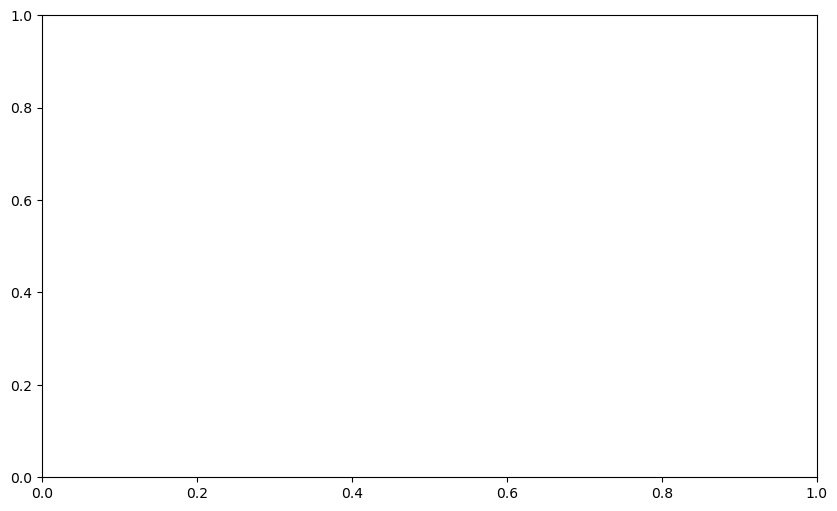

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Создайте фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Отображение геометрии каждого города своим цветом
color = Municipality_df['color']

Municipality_df.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)
LRT_stations.plot(ax=ax, color ='#006400', alpha=0.5)
TMA_lines.plot(ax=ax, color ='#FF00FF' , linestyle ='--', alpha=0.9)


# Добавление заголовка
ax.set_title('Цвета городов')

# Отключение осей
ax.axis('off')

# Сохранение изображения
fig.savefig('Municipality_Colors.jpg', dpi=300, bbox_inches='tight')


In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Загрузите данные top_df
top_df = gpd.GeoDataFrame(top_df, geometry=top_df["geometry"])

# Нормализация значений MOTORATE40
norm = plt.Normalize(min(top_df['y_predict']), max(top_df['y_predict']))
top_df['color'] = norm(top_df['y_predict'])

# Создайте фигуру и осей
fig, ax = plt.subplots(figsize=(25, 20))

# Отображение геометрии с цветовой дифференциацией (top_df layer)
top_df.plot(ax=ax, column='color', cmap='Reds', edgecolor='black', linewidth=0.5, zorder=10)  # Установить zorder=10

# Define the point coordinates (assuming x0 and y0 are your variables)
point = gpd.GeoSeries(Point(x0, y0))

# Plot the point with a red marker (or customize marker style and color)
point.plot(ax=ax, marker='o', markersize=30, color='red', label='Point (x0, y0)')

# # Добавление значений y_predict на каждый район
for idx, row in top_df.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    # Проверка, находится ли район в пределах заданных границ
    if 170000 <= x <= 205000 and 640000 <= y <= 680000:
        text = f"{int(row['y_predict'])}"  # Отображение MOTORATE40
        ax.text(x, y, text, ha='center', va='center', fontsize=6, color='black')

# Отображение геометрии каждого города своим цветом (Municipality_df layer)
color = Municipality_df['color']
Municipality_df.plot(ax=ax, color=color, edgecolor='black', linewidth=0.1, zorder=5)  # Установить zorder=5

# Добавление заголовка и цветовой шкалы
ax.set_title('y_predict')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
fig.colorbar(sm, label='y_predict', ax=ax)  # Явно указать ось ax

# Отображение карты
ax.axis('off')  # Скрыть оси
ax.set_xlim([170000, 205000])  # Задать пределы по x
ax.set_ylim([640000, 680000])  # Задать пределы по y

# Show the plot
plt.show()


SyntaxError: invalid non-printable character U+00A0 (1641413499.py, line 25)

In [39]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.2
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
apriori                       1.0.0
apyori                        1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         23.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempf